# DataViz Project - Airplane Crashes Since 1908

## Exploratory Data Analysis

### 1. Reading the data



In [59]:
import pandas as pd

file_path = "dataset/clean_v1_Airplane_Crashes_and_Fatalities_Since_1908.csv"
dframe = pd.read_csv(file_path)

# get information about data entries by column:
dframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 11 columns):
Date          5268 non-null object
Time          3049 non-null object
Location      5248 non-null object
Latitude      5240 non-null float64
Longitude     5240 non-null float64
Operator      5250 non-null object
Type          5241 non-null object
Aboard        5246 non-null float64
Fatalities    5256 non-null float64
Ground        5246 non-null float64
Summary       4878 non-null object
dtypes: float64(5), object(6)
memory usage: 452.8+ KB


From the info() method we can see there are several missing values - difference from the total of 5268 entries

Date          5268 

Time          3049  *-> missing 2219 values*

Location      5248  *-> missing 20 values*

Latitude      5240  *-> missing 28 values (generated from Location, missing 8)*

Longitude     5240  *-> missing 28 values (generated from Location, missing 8)*

Operator      5250  *-> missing 18 values*

Type          5241  *-> missing 19 values*

Aboard        5246  *-> missing 22 values*

Fatalities    5256  *-> missing 12 values*

Ground        5246  *-> missing 22 values*

Summary       4878  *-> missing 390 values*



In [60]:
# get a brief statistical summary of the data
dframe.describe(include="object") #dtype object

,Date,Time,Location,Operator,Type,Summary
count,5268,3049,5248,5250,5241,4878
unique,4753,999,4304,2476,2445,4673
top,06/18/1972,15:00,"Moscow, Russia",Aeroflot,Douglas DC-3,Crashed during takeoff.
freq,4,32,15,179,334,15


In [61]:
dframe.describe() #default only numerical values

,Latitude,Longitude,Aboard,Fatalities,Ground
count,5240.000000,5240.000000,5246.000000,5256.000000,5246.000000
mean,27.010367,-16.061076,27.554518,20.068303,1.608845
std,24.570333,83.419121,43.076711,33.199952,53.987827
min,-77.529716,-176.669861,0.000000,0.000000,0.000000
25%,10.944428,-82.810095,5.000000,3.000000,0.000000
50%,34.392923,-9.149480,13.000000,9.000000,0.000000
75%,43.801488,37.615021,30.000000,23.000000,0.000000
max,80.449997,178.800476,644.000000,583.000000,2750.000000


Only numerical columns are described if we don't use the argument include="object". 
We can spot some possible errors in Aboard and Fatalities: the minimum shouldn't be zero for either of them, as this dataset is only about crashes with reported fatalities - we'll have to investigate this, as it could be due to missing values or a wrong value.

The fact that there are only 4673 unique summaries of the crash doesn't necessarily point to duplicate entries - it might just be the summary was the same kind of description, such as "Crashed on landing".


### 2. Cleaning and organizing the data

Correct types for columns:

In [62]:
dframe["Date"].head()

0    09/17/1908
1    07/12/1912
2    08/06/1913
3    09/09/1913
4    10/17/1913
Name: Date, dtype: object

In [63]:
pd.to_datetime(dframe["Date"], format="%m/%d/%Y", errors="coerce")

0      1908-09-17
1      1912-07-12
2      1913-08-06
3      1913-09-09
4      1913-10-17
5      1915-03-05
6      1915-09-03
7      1916-07-28
8      1916-09-24
9      1916-10-01
10     1916-11-21
11     1916-11-28
12     1917-03-04
13     1917-03-30
14     1917-05-14
15     1917-06-14
16     1917-08-21
17     1917-10-20
18     1918-04-07
19     1918-05-10
20     1918-08-11
21     1918-12-16
22     1919-05-25
23     1919-07-19
24     1919-10-02
25     1919-10-14
26     1919-10-20
27     1919-10-30
28     1920-03-10
29     1920-03-30
          ...    
5238   2008-11-13
5239   2008-11-16
5240   2008-11-27
5241   2008-12-03
5242   2008-12-11
5243   2008-12-15
5244   2009-01-04
5245   2009-01-15
5246   2009-02-07
5247   2009-02-07
5248   2009-02-12
5249   2009-02-15
5250   2009-02-20
5251   2009-02-25
5252   2009-03-09
5253   2009-03-12
5254   2009-03-22
5255   2009-03-23
5256   2009-04-01
5257   2009-04-06
5258   2009-04-09
5259   2009-04-17
5260   2009-04-17
5261   2009-04-29
5262   200

In [64]:
dframe['Aboard'] = pd.to_numeric(dframe['Aboard'], downcast="integer", errors="coerce")
dframe['Aboard']
#dtype="Int64" could also work to cast these as integers and maintain rows with NaN, 
#meanwhile they are floats

0         2.0
1         5.0
2         1.0
3        20.0
4        30.0
5        41.0
6        19.0
7        20.0
8        22.0
9        19.0
10       28.0
11       20.0
12       20.0
13       23.0
14       21.0
15       24.0
16       18.0
17       18.0
18       23.0
19       22.0
20       19.0
21        1.0
22        1.0
23        1.0
24        1.0
25        1.0
26        NaN
27        1.0
28        1.0
29        1.0
        ...  
5238      7.0
5239      8.0
5240      7.0
5241      3.0
5242      3.0
5243     12.0
5244      9.0
5245    155.0
5246     28.0
5247      2.0
5248     49.0
5249     13.0
5250      5.0
5251    134.0
5252     11.0
5253     18.0
5254     14.0
5255      2.0
5256     16.0
5257     24.0
5258      6.0
5259     11.0
5260     11.0
5261      7.0
5262     18.0
5263    112.0
5264      4.0
5265    228.0
5266      1.0
5267     13.0
Name: Aboard, Length: 5268, dtype: float64


Before proceeding with changes to other datatypes, we need to check for NaN values, etc.

> isna(obj)	    Detect missing values for an array-like object.
>
> isnull(obj)	Detect missing values for an array-like object.
>
> notna(obj)	Detect non-missing values for an array-like object.
>
> notnull(obj)	Detect non-missing values for an array-like object.

Aboard's mean value is 27.5, so we can use that as a temporary placeholder (or 28, for an integer)

In [65]:
import numpy as np

aboard_series = dframe['Aboard']
aboard_series.fillna("28", inplace=True)
aboard_series

#alternatively, replace([1.5, df00], [np.nan, 'a'])
# see http://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#numeric-replacement

0         2
1         5
2         1
3        20
4        30
5        41
6        19
7        20
8        22
9        19
10       28
11       20
12       20
13       23
14       21
15       24
16       18
17       18
18       23
19       22
20       19
21        1
22        1
23        1
24        1
25        1
26       28
27        1
28        1
29        1
       ... 
5238      7
5239      8
5240      7
5241      3
5242      3
5243     12
5244      9
5245    155
5246     28
5247      2
5248     49
5249     13
5250      5
5251    134
5252     11
5253     18
5254     14
5255      2
5256     16
5257     24
5258      6
5259     11
5260     11
5261      7
5262     18
5263    112
5264      4
5265    228
5266      1
5267     13
Name: Aboard, Length: 5268, dtype: object

In [84]:
#are there NA values left? it will return a list with the values that satisfy the condition, 
#otherwise empty list
null_aboard = aboard_series[aboard_series.isnull()]
print("No null values in Aboard series.") if not null_aboard.any() else print(null_aboard)
dframe["Aboard"] = pd.to_numeric(aboard_series, errors="coerce", downcast="integer")
#check dataframe to see if all replacements were done.. aboard should now have 5268 ints
dframe.info()

No null values in Aboard series.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 11 columns):
Date          5268 non-null object
Time          3049 non-null object
Location      5248 non-null object
Latitude      5240 non-null float64
Longitude     5240 non-null float64
Operator      5250 non-null object
Type          5241 non-null object
Aboard        5268 non-null int16
Fatalities    5256 non-null float64
Ground        5246 non-null float64
Summary       4878 non-null object
dtypes: float64(4), int16(1), object(6)
memory usage: 421.9+ KB


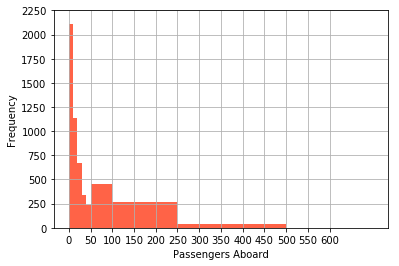

In [126]:
#quick plot
import matplotlib as mp
import matplotlib.pyplot as plt

bins_aboard = [0, 10, 20, 30, 40, 50, 100, 250, 500, 700] #bins don't have to be equal

dframe["Aboard"].hist(bins = bins_aboard, color = "tomato")
plt.ylabel("Frequency")
plt.xlabel("Passengers Aboard")
plt.yticks(range(0, 2500, 250))
plt.xticks(range(0, 650, 50))
plt.show()

In [120]:
dframe["Aboard"].max()


(1.0, 0.38823529411764707, 0.2784313725490196, 1.0)